In [21]:
from numpy import genfromtxt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

In [22]:
sentences = pd.read_csv('../data/processed/temple_radio_1_2_sentences_with_translation.csv')
sentences.Translation = [sent.strip() for sent in sentences.Translation.values]
sent_embeddings = genfromtxt('../data/processed/temple_radio_1_2_sentence_embeddings.csv', delimiter=',')
labels = pd.read_csv('../data/processed/labels.csv')

In [23]:
sentences['class'] = 0 #"no_finding"

In [24]:
# [print(l) for l in list(set(list(sentences.Translation))) if l not in list(labels.Labels)]
# [print(l) for l in list(labels.Labels) if l not in list(set(list(sentences.Translation)))]

In [25]:
green = labels[:5]
orange = labels[5:12]
red = labels[12:18]
purple = labels[18:20]

In [26]:
def check_freq(label):
    pos_res = (sentences['Translation'] == label)
    return sentences[pos_res]

In [27]:
green_indexes = []
green_class = []
for label in green.values.tolist():
    result = check_freq(label[0])
    green_indexes.extend(result.index.tolist())
    
green_class = [1 for item in green_indexes]
sentences.loc[green_indexes, 'class'] = green_class

In [63]:
len(green_class)

19

In [28]:
orange_indexes = []
orange_class = []
for label in orange.values.tolist():
    result = check_freq(label[0])
    orange_indexes.extend(result.index.tolist())
    
orange_class = [2 for item in orange_indexes]
sentences.loc[orange_indexes, 'class'] = orange_class

In [29]:
red_indexes = []
red_class = []
for label in red.values.tolist():
    result = check_freq(label[0])
    red_indexes.extend(result.index.tolist())
    
red_class = [3 for item in red_indexes]
sentences.loc[red_indexes, 'class'] = red_class

In [30]:
purple_indexes = []
purple_class = []
for label in purple.values.tolist():
    result = check_freq(label[0])
    purple_indexes.extend(result.index.tolist())
    
purple_class = [4 for item in purple_indexes]
sentences.loc[purple_indexes, 'class'] = purple_class

([<matplotlib.axis.XTick at 0x7fd86ef6aca0>,
 [Text(0, 0, 'No Finding 49.20'),
  Text(0, 0, 'Green 7.60'),
  Text(0, 0, 'Orange 34.00'),
  Text(0, 0, 'Red 7.20'),
  Text(0, 0, 'Purple 2.00')])

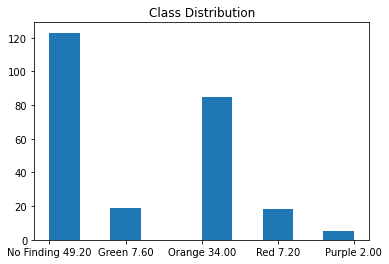

In [87]:
plt.hist(sentences['class'])
plt.title('Class Distribution')
plt.xticks([0, 1, 2, 3, 4], (f"No Finding {(len(sentences[sentences['class'] == 0])/len(sentences) * 100):.2f}", 
                             f"Green {(len(green_indexes)/len(sentences) * 100):.2f}", 
                             f"Orange {(len(orange_indexes)/len(sentences) * 100):.2f}", 
                             f"Red {(len(red_indexes)/len(sentences) * 100):.2f}", 
                             f"Purple {(len(purple_indexes)/len(sentences) * 100):.2f}"))

In [76]:
new_df = pd.DataFrame(sent_embeddings)
new_df['class'] = sentences['class']
new_df["sentence"] = sentences.Sentence
new_df['translation'] = sentences.Translation

In [77]:
new_df = new_df.sample(frac=1).reset_index(drop=True)

In [88]:
y = new_df[["class"]]
X = new_df.drop(["class"], axis = 1)

In [95]:
skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
i = 0
conf_scores = []
acc_scores = []

for train, test in skf.split(X, y): # Provides train/test indices to split data in train/test sets.
    clf = KNeighborsClassifier().fit(X.drop(["sentence", "translation"], axis = 1).loc[train], y.loc[train].values.ravel())
    y_pred = clf.predict(X.drop(["sentence", "translation"], axis = 1).loc[test])
    
    df_skf = pd.DataFrame(X[['sentence', 'translation']].loc[test])
 
    df_skf['y_true'] = y.loc[test]
    df_skf['pred'] = y_pred
#     df_skf.to_csv(f"../data/processed/classification_results/kNN_result_{i}.csv", index=False)
    acc = accuracy_score(y.loc[test], y_pred)
    acc_scores.append(round(acc, 4))
    conf_scores.append(confusion_matrix(y.loc[test], y_pred))
    i += 1
print(f"confusion matrix score:\n{sum(conf_scores)}\n")
print(acc_scores)

confusion matrix score:
[[106   0  16   1   0]
 [  1  12   6   0   0]
 [  5   1  78   1   0]
 [  0   2   4  12   0]
 [  0   1   4   0   0]]

[0.82, 0.8, 0.86, 0.82, 0.86]


In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
i = 0
conf_scores = []
acc_scores = []

for train, test in skf.split(X, y): # Provides train/test indices to split data in train/test sets.
    clf = LogisticRegression(multi_class='ovr', max_iter=1000).fit(X.drop(["sentence", "translation"], axis = 1).loc[train], y.loc[train].values.ravel())
    y_pred = clf.predict(X.drop(["sentence", "translation"], axis = 1).loc[test])
    
    df_skf = pd.DataFrame(X[['sentence', 'translation']].loc[test])
 
    df_skf['y_true'] = y.loc[test]
    df_skf['pred'] = y_pred
#     df_skf.to_csv(f"../data/processed/classification_results/result_{i}.csv", index=False)
#     print(confusion_matrix(y.loc[test], y_pred))
    acc = accuracy_score(y.loc[test], y_pred)
    acc_scores.append(round(acc, 4))
    conf_scores.append(confusion_matrix(y.loc[test], y_pred))
    i += 1
print(f"confusion matrix score:\n{sum(conf_scores)}\n")
print(acc_scores)